In [0]:
#Losding the data
import json 
dataset = []
with open("/content/drive/My Drive/NLP/Sarcasm_Headlines_Dataset.json",'r') as f:
    for line in f:
        dataset.append(json.loads(line))

In [2]:
#Dataset content and format
dataset[23]

{'article_link': 'https://www.huffingtonpost.comhttp://pubx.co/dnWZew',
 'headline': "this is why you shouldn't go to the circus",
 'is_sarcastic': 0}

In [0]:
#Making the list of sentences,url and labels
sentences = []
labels = []
url = []
for data in dataset:
    url.append(data['article_link'])
    sentences.append(data['headline'])
    labels.append(data['is_sarcastic'])

In [4]:
print(len(sentences))

26709


In [0]:
training_size = 20000

In [0]:
#Training and tesing data
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [0]:
#defining hyperparameters
vocab_size = 1000
embedding_dim  = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_token = "<00V>"

In [0]:
#Tokeninzing the data and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size , oov_token = oov_token)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen = max_length,truncating = trunc_type)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen = max_length,padding = padding_type,truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length,padding = padding_type,truncating = trunc_type)

In [0]:
#define the model for neural network
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [10]:
#Compile the model and printing the summary
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 50

In [13]:
#training the data
history = model.fit(training_padded,training_labels,epochs = num_epochs,validation_data = (testing_padded,testing_labels),verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 - 1s - loss: 0.5683 - acc: 0.6927 - val_loss: 0.4443 - val_acc: 0.7882
Epoch 2/50
20000/20000 - 1s - loss: 0.3936 - acc: 0.8200 - val_loss: 0.4046 - val_acc: 0.8091
Epoch 3/50
20000/20000 - 1s - loss: 0.3681 - acc: 0.8336 - val_loss: 0.4031 - val_acc: 0.8149
Epoch 4/50
20000/20000 - 1s - loss: 0.3602 - acc: 0.8375 - val_loss: 0.4045 - val_acc: 0.8074
Epoch 5/50
20000/20000 - 1s - loss: 0.3555 - acc: 0.8383 - val_loss: 0.4071 - val_acc: 0.8146
Epoch 6/50
20000/20000 - 1s - loss: 0.3531 - acc: 0.8396 - val_loss: 0.4092 - val_acc: 0.8141
Epoch 7/50
20000/20000 - 1s - loss: 0.3527 - acc: 0.8380 - val_loss: 0.4037 - val_acc: 0.8161
Epoch 8/50
20000/20000 - 1s - loss: 0.3511 - acc: 0.8393 - val_loss: 0.4048 - val_acc: 0.8141
Epoch 9/50
20000/20000 - 1s - loss: 0.3503 - acc: 0.8406 - val_loss: 0.4065 - val_acc: 0.8134
Epoch 10/50
20000/20000 - 1s - loss: 0.3487 - acc: 0.8429 - val_loss: 0.4085 - val_acc: 0.8123
Epoch 11/5

In [0]:
#Plotting the graphs
import matplotlib.pyplot as plt
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string],'val_'+string)
  plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'acc' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


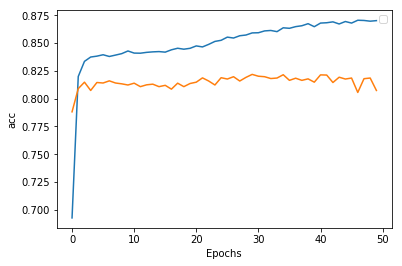

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'loss' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


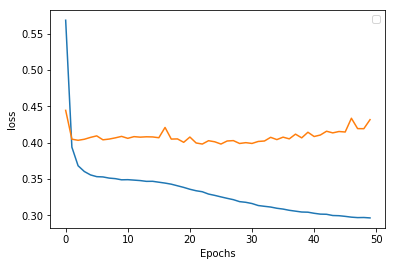

In [43]:
plot_graphs(history,"acc")
plot_graphs(history,"loss")

In [29]:
#Testing the output from testing sentences
import numpy
acc = 0
ran = 30
for i in range(ran):
  rev = testing_sentences[i]
  tokenizer.fit_on_texts(rev)
  word_index = tokenizer.word_index
  sequences = tokenizer.texts_to_sequences(rev)
  pod = pad_sequences(sequences,maxlen = max_length,truncating = trunc_type)
  review = pod[0]
  print("Text: ",rev)
  ytest_prediction = model.predict(pod)
  rou = numpy.round_(ytest_prediction[0])
  if testing_labels[i]== 1:
    print("Actual: Sarcastic")
  else:
    print("Actual: Not Sarcastic")
  if rou[0] == 1:
    print("Predicted: Sarcastic")
  else:
    print("Predicted: Not Sarcastic")


Text:  pediatricians announce 2011 newborns are ugliest babies in 30 years
Actual: Sarcastic
Predicted: Sarcastic
Text:  don't rely on your fitness tracker to lose weight
Actual: Not Sarcastic
Predicted: Sarcastic
Text:  you might want to cut back on the soap
Actual: Not Sarcastic
Predicted: Sarcastic
Text:  bausch & lomb introduces line of aviator contacts
Actual: Sarcastic
Predicted: Sarcastic
Text:  7 everyday habits for glowing, younger-looking skin
Actual: Not Sarcastic
Predicted: Sarcastic
Text:  report: sky normal today
Actual: Sarcastic
Predicted: Not Sarcastic
Text:  bernie sanders to propose new rule requiring fair prices for taxpayer-funded drugs
Actual: Not Sarcastic
Predicted: Sarcastic
Text:  friend who listened to podcast on watergate bursts into conversation with guns fucking blazing
Actual: Sarcastic
Predicted: Not Sarcastic
Text:  economists warn new graduates may have to tough it out for 5 to 6 weeks before landing dream job
Actual: Sarcastic
Predicted: Sarcastic
Tex

In [36]:
#Custom input
text = input("Enter the text :")
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(text)
pod = pad_sequences(sequences,maxlen = max_length,truncating = trunc_type)
review = pod[0]
print("Text: ",text)
ytest_prediction = model.predict(pod)
rou = numpy.round_(ytest_prediction[0])
if rou[0] == 1:
    print("Predicted: Sarcastic")
else:
    print("Predicted: Not Sarcastic")

Enter the text :I thought you had brains!
Text:  I thought you had brains!
Predicted: Sarcastic
